## Create CNN Model and Optimize it Using Keras Tuner 

In [ ]:
!pip install keras-tuner 
#it decides how many layers, patterns we should use.

     |████████████████████████████████| 98 kB 3.1 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#scale down images(all the pixels between 0 to 1) helps to quickly train
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
train_images[0].shape #size of 1st image

(28, 28)

In [ ]:
#In input we have to give how many no of images do we have, what is the pixel?, and their dimension in CNN model
#resizing
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [ ]:
def build_model(hp):
  model = keras.Sequential([
      keras.layers.Conv2D(
          filters=hp.Int('conv_1_filter',min_value=64, max_value =128,step=16), #Find No of filters which we should use will be in between 64 and 128
          kernel_size=hp.Choice('conv_1_kernel',values=[3,5]), #choose kernal_size
          activation = 'relu',
          input_shape=(28,28,1)
      ),
       keras.layers.Conv2D(
          filters=hp.Int('conv_2_filter',min_value=32, max_value =64,step=16),
          kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
          activation = 'relu',
      ),
       keras.layers.Flatten(),
       keras.layers.Dense(
          units = hp.Int('dense_1_units',min_value=32,max_value=128,step=16), #selecting number of nodes between 32 and 128 which is performing well
          activation = 'relu'
      ),
      keras.layers.Dense(10,activation='softmax')  #For multiclass classification and put in last layer

  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])), #Selecting learning rate
                loss='sparse_categorical_crossentropy', #Categorical cross-entropy is used when true labels are one-hot encoded, 
                metrics=['accuracy'])                   #for example, we have the following true values for 3-class classification problem [1,0,0] , [0,1,0] and [0,0,1].
  return model

In [ ]:
from keras_tuner import RandomSearch #This will find best parameters for particular problem statement
from keras_tuner.engine.hyperparameters import HyperParameters


In [ ]:
#Run random search
#model, objective- name of model metric to minimize or maximize, number of trials
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion") #max_trials only for 3 epochs


In [ ]:
tuner_search.search(train_images,train_labels,epochs=3, validation_split=0.1)

Trial 5 Complete [00h 16m 22s]
val_accuracy: 0.8651666641235352

Best val_accuracy So Far: 0.9100000262260437
Total elapsed time: 01h 24m 17s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model =tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 96)        2496      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        55360     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 112)               3469424   
                                                                 
 dense_1 (Dense)             (None, 10)                1130      
                                                                 
Total params: 3,528,410
Trainable params: 3,528,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels,epochs=10,validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 310s 183ms/step - loss: 0.1482 - accuracy: 0.9437 - val_loss: 0.2539 - val_accuracy: 0.9158
Epoch 5/10
1688/1688 [==============================] - 306s 181ms/step - loss: 0.1085 - accuracy: 0.9592 - val_loss: 0.2784 - val_accuracy: 0.9175
Epoch 6/10
1688/1688 [==============================] - 305s 181ms/step - loss: 0.0809 - accuracy: 0.9696 - val_loss: 0.3413 - val_accuracy: 0.9048
Epoch 7/10
1688/1688 [==============================] - 306s 181ms/step - loss: 0.0621 - accuracy: 0.9781 - val_loss: 0.3932 - val_accuracy: 0.9083
Epoch 8/10
1688/1688 [==============================] - 306s 181ms/step - loss: 0.0492 - accuracy: 0.9820 - val_loss: 0.4837 - val_accuracy: 0.9118
Epoch 9/10
1688/1688 [==============================] - 307s 182ms/step - loss: 0.0378 - accuracy: 0.9863 - val_loss: 0.5084 - val_accuracy: 0.9092
Epoch 10/10
1688/1688 [==============================] - 306s 181ms/step - loss: 0.0327 - accuracy: 0.9892 - val

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 14s 44ms/step - loss: 0.5245 - accuracy: 0.9082


[0.5244717597961426, 0.9082000255584717]

In [ ]:
#predict first 10 images
p = model.predict(test_images[:10])
print(p)

[[2.58232682e-14 2.65996970e-20 2.95379904e-14 5.82169426e-18
  7.96288809e-21 4.33858746e-14 1.30520547e-24 3.99490965e-08
  4.04456888e-19 1.00000000e+00]
 [1.78420677e-07 5.12201544e-20 9.99330640e-01 1.06517256e-19
  6.69252477e-04 2.99040361e-13 2.03808129e-12 1.45332431e-15
  1.10214470e-14 1.54461594e-13]
 [1.74448516e-26 1.00000000e+00 6.39224838e-25 3.02093593e-25
  1.63663279e-31 1.07751988e-21 1.43804788e-27 1.23961581e-38
  4.61918357e-34 0.00000000e+00]
 [1.01380435e-30 1.00000000e+00 4.14941366e-28 6.26194286e-25
  1.82527114e-26 2.66479587e-26 9.37586023e-26 0.00000000e+00
  1.23073886e-38 0.00000000e+00]
 [3.04990611e-03 1.71993350e-10 1.92892207e-06 5.18464801e-14
  1.17626557e-08 5.47768855e-14 9.96948183e-01 7.20472593e-17
  9.90691971e-14 1.18444725e-15]
 [3.83748339e-25 1.00000000e+00 1.73245325e-21 3.19549310e-26
  3.42001179e-24 3.38848525e-22 1.88095186e-24 0.00000000e+00
  1.41340359e-30 5.34908717e-37]
 [8.23260849e-26 1.75822060e-19 1.78113480e-09 6.14169285e

In [ ]:
pred = np.argmax(p, axis=1)
print(pred)
print(test_labels[:10])

[9 2 1 1 6 1 4 6 5 7]
[9 2 1 1 6 1 4 6 5 7]


In [ ]:
test_images[1].shape

(28, 28, 1)

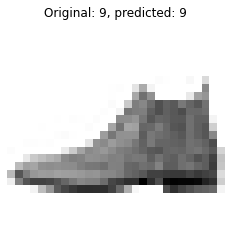

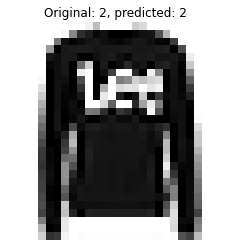

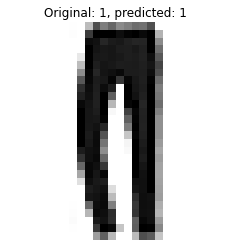

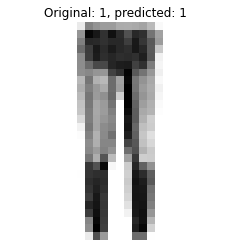

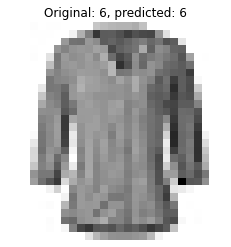

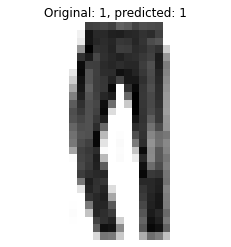

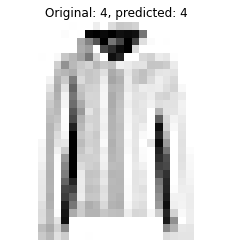

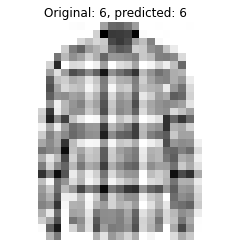

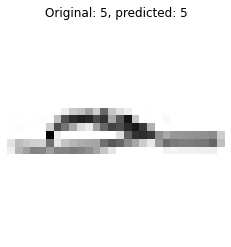

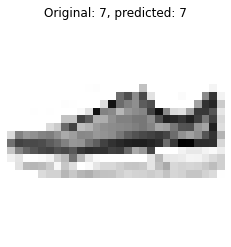

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualizing the result
for i in range(10):
  plt.imshow(np.squeeze(test_images[i]), cmap="binary")
  plt.title('Original: {}, predicted: {}'.format(test_labels[i],pred[i]))
  plt.axis("Off")
  plt.figure()
